## This code performs an analysis of news articles-related data using Natural Language Processing. 
### Data is from https://drive.google.com/file/d/15X00ZWBjla7qGOIW33j8865QdF89IyAk/view. The data is collected for duration of 2008/2016. 
### Variables/attributes are: 
* time_created - time at which the article title was created
* date_created - date at which the article title was created    
* up_votes - number of upvotes on the article, this is equivalent of likes on facebook
* down_votes - number of downvotes on the article, this is equivalent of dislikes on youtube videos
* title - Title of the news article       
* over_18 - True if the title is only suitable for adults, otherwise False 
* author - I would assume this is the journalist who wrote the article 
* category - The category to which the article belongs, they all belong to worldwide category of news

### Problem definition: The article was created on a weekend or not is our target variable i:e we want to know if this variable is predicted correctly or not based off of text analysis of title of the article. 


#### Import libraries and import data from the link 

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from io import StringIO

orig_url='https://drive.google.com/file/d/15X00ZWBjla7qGOIW33j8865QdF89IyAk/view'

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
dfs = pd.read_csv(csv_raw)
print(dfs.head())

   time_created date_created  up_votes  down_votes  \
0    1201232046   2008-01-25         3           0   
1    1201232075   2008-01-25         2           0   
2    1201232523   2008-01-25         3           0   
3    1201233290   2008-01-25         1           0   
4    1201274720   2008-01-25         4           0   

                                             title  over_18    author  \
0                Scores killed in Pakistan clashes    False     polar   
1                 Japan resumes refuelling mission    False     polar   
2                  US presses Egypt on Gaza border    False     polar   
3     Jump-start economy: Give health care to all     False   fadi420   
4  Council of Europe bashes EU&UN terror blacklist    False  mhermans   

    category  
0  worldnews  
1  worldnews  
2  worldnews  
3  worldnews  
4  worldnews  


#### Preliminary data analysis and feature engineering 

In [153]:
dfs.head()

,time_created,date_created,up_votes,down_votes,title,over_18,author,category
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews


In [154]:
dfs.info() ## No missing cells, data points...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509236 entries, 0 to 509235
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   time_created  509236 non-null  int64 
 1   date_created  509236 non-null  object
 2   up_votes      509236 non-null  int64 
 3   down_votes    509236 non-null  int64 
 4   title         509236 non-null  object
 5   over_18       509236 non-null  bool  
 6   author        509236 non-null  object
 7   category      509236 non-null  object
dtypes: bool(1), int64(3), object(4)
memory usage: 27.7+ MB


In [155]:
dfs.describe() ## Looks like smallest down vote possible is 0 and can't go into negative values...

,time_created,up_votes,down_votes
count,5.092360e+05,509236.000000,509236.0
mean,1.380240e+09,112.236283,0.0
std,7.090436e+07,541.694675,0.0
min,1.201232e+09,0.000000,0.0
25%,1.341585e+09,1.000000,0.0
50%,1.392909e+09,5.000000,0.0
75%,1.436527e+09,16.000000,0.0
max,1.479817e+09,21253.000000,0.0


In [156]:
dfs.sort_values(by=['up_votes'], ascending=False, na_position='first') 
## Biotech article by KRISHNA53 has got the highest upvotes out of all the article titles...

,time_created,date_created,up_votes,down_votes,title,over_18,author,category
377200,1434818471,2015-06-20,21253,0,A biotech startup has managed to 3-D print fak...,False,KRISHNA53,worldnews
391415,1440421079,2015-08-24,13435,0,Twitter has forced 30 websites that archive po...,False,joeyoungblood,worldnews
450818,1459706506,2016-04-03,13244,0,2.6 terabyte leak of Panamanian shell company ...,False,mister_geaux,worldnews
391318,1440367768,2015-08-23,12333,0,The police officer who leaked the footage of t...,False,navysealassulter,worldnews
390252,1439939168,2015-08-18,11288,0,Paris shooting survivor suing French media for...,False,seapiglet,worldnews
...,...,...,...,...,...,...,...,...
220099,1381644882,2013-10-13,0,0,Chinese Premier Li Keqiang has been granted th...,False,davidreiss666,worldnews
431262,1453107414,2016-01-18,0,0,Taliban denies role in latest Afghanistan bombing,False,raziinuaq,worldnews
220101,1381645228,2013-10-13,0,0,Possible lead in Madeleine McCann case,False,CristabelYYC,worldnews
431259,1453107145,2016-01-18,0,0,Suicide Attack Kills at Least 13 in Afghanistan,False,middleeastnewsman,worldnews


#### Extract text length of titles 

In [157]:
dfs['text length'] = dfs['title'].apply(len)

In [158]:
sns.set_style('white')
%matplotlib inline

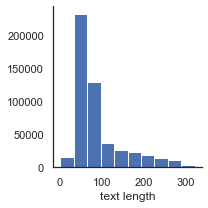

In [159]:
g = sns.FacetGrid(dfs)
g.map(plt.hist,'text length')

In [160]:
dfs['text length'].describe() 
## The article from KRISHNA53 is among the lengthiest article titles (top 25th percentile) with 289 words... 
## whereas the max length is 323... 

count    509236.000000
mean         89.746999
std          59.929427
min           1.000000
25%          52.000000
50%          66.000000
75%         100.000000
max         323.000000
Name: text length, dtype: float64

In [161]:
dfs.groupby('category').describe() ## there's only 1 category of news here... 

time_created                                            \
                 count          mean           std           min   
category                                                           
worldnews     509236.0  1.380240e+09  7.090436e+07  1.201232e+09   

                                                                   up_votes  \
                    25%           50%           75%           max     count   
category                                                                      
worldnews  1.341585e+09  1.392909e+09  1.436527e+09  1.479817e+09  509236.0   

                       ... down_votes      text length                        \
                 mean  ...        75%  max       count       mean        std   
category               ...                                                     
worldnews  112.236283  ...        0.0  0.0    509236.0  89.746999  59.929427   

                                          
           min   25%   50%    75%    max  
category                                  
worldnews  1.0  52.0  66.0  100.0  323.0  

[1 rows x 32 columns]

In [162]:
dfs['up_votes'].describe()

count    509236.000000
mean        112.236283
std         541.694675
min           0.000000
25%           1.000000
50%           5.000000
75%          16.000000
max       21253.000000
Name: up_votes, dtype: float64

In [163]:
dfs.groupby('over_18').describe() ## Two categories of article titles as per age... 
## Over-18 articles are only 320 out of 509236

time_created                                                          \
               count          mean           std           min           25%   
over_18                                                                        
False       508916.0  1.380243e+09  7.090853e+07  1.201232e+09  1.341591e+09   
True           320.0  1.374549e+09  6.378159e+07  1.206381e+09  1.321828e+09   

                                                   up_votes              ...  \
                  50%           75%           max     count        mean  ...   
over_18                                                                  ...   
False    1.392917e+09  1.436532e+09  1.479817e+09  508916.0  112.067681  ...   
True     1.377072e+09  1.424424e+09  1.479642e+09     320.0  380.375000  ...   

        down_votes      text length                                          \
               75%  max       count       mean        std   min   25%   50%   
over_18                                                                       
False          0.0  0.0    508916.0  89.748214  59.938701   1.0  52.0  66.0   
True           0.0  0.0       320.0  87.815625  42.727030  26.0  61.0  78.0   

                       
           75%    max  
over_18                
False    100.0  323.0  
True     101.0  300.0  

[2 rows x 32 columns]

In [164]:
dfs.author.value_counts() ## How many times does each author has an article?...

davidreiss666       8897
anutensil           5730
DoremusJessup       5037
maxwellhill         4023
igeldard            4013
                    ... 
tiny_tim31             1
new_to__internet       1
pepsipig               1
_seanyewest            1
graduallemon           1
Name: author, Length: 85838, dtype: int64

In [165]:
dfs.author.nunique() ## Know how many unique authors... 85838 authors have written 509236 articles...

85838

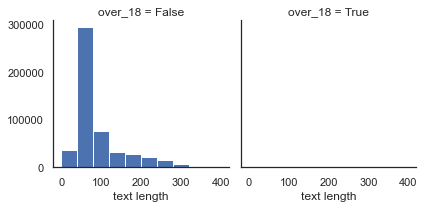

In [166]:
g = sns.FacetGrid(dfs, col = 'over_18')
g.map(plt.hist,'text length',range=[0, 400]) ## over-18 articles cannot be seen in the plot... something's wrong...
## That is because of the Y axis range... 

In [167]:
kk = dfs[dfs['over_18']==True]
kk ## all over-18 articles separated, we can see the text length is not zero in most cases... 

,time_created,date_created,up_votes,down_votes,title,over_18,author,category,text length
1885,1206381438,2008-03-24,189,0,Pics from the Tibetan protests - more graphic ...,True,pressed,worldnews,76
6721,1211138718,2008-05-18,5,0,"MI5 linked to Max Mosleyâs Nazi-style, sadom...",True,alllie,worldnews,192
8414,1212694925,2008-06-05,0,0,Tabloid Horrifies Germany: Poland s Yellow Pre...,True,stesch,worldnews,135
12163,1216672016,2008-07-21,0,0,Love Parade Dortmund: Techno Festival Breaks R...,True,stesch,worldnews,101
12699,1217381380,2008-07-30,5,0,IDF kills young Palestinian boy. Potentially N...,True,cup,worldnews,50
...,...,...,...,...,...,...,...,...,...
503776,1477889966,2016-10-31,4,0,Latest Italian Earthquake Devastates Medieval ...,True,pixelinthe,worldnews,51
508067,1479400229,2016-11-17,12,0,ISIS Release Video Showing Melbourne As A Poss...,True,halacska,worldnews,57
508176,1479434681,2016-11-18,0,0,Animal welfare activists have released footage...,True,NinjaDiscoJesus,worldnews,137
508376,1479492875,2016-11-18,6,0,Jungle Justice : Public lynching of a street ...,True,avivi_,worldnews,60


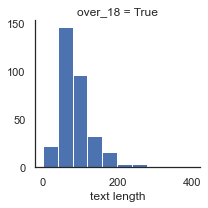

In [168]:
g = sns.FacetGrid(kk, col = 'over_18')
g.map(plt.hist,'text length',range=[0, 400]) 
## We can see the difference in range of Y axis here and earlier plot... 

<AxesSubplot:xlabel='over_18', ylabel='text length'>

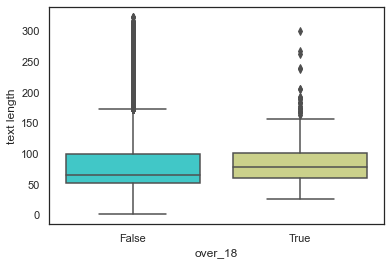

In [169]:
sns.boxplot(x='over_18',y='text length',data=dfs,palette='rainbow')
## Median text length is pretty close for both types of articles...

<AxesSubplot:xlabel='over_18', ylabel='count'>

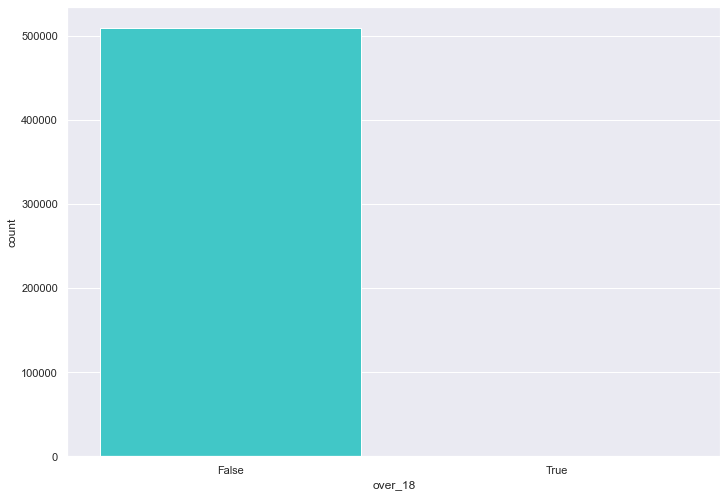

In [170]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x='over_18',data=dfs,palette='rainbow')
## Again, over-18 articles' count which is only 320, can't be seen because of the scale of Y axis... 

<AxesSubplot:xlabel='over_18', ylabel='count'>

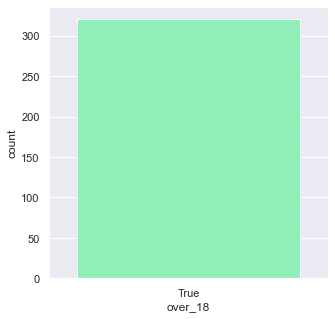

In [171]:
sns.set(rc={'figure.figsize':(5,5)})
sns.countplot(x='over_18',data=kk,palette='rainbow')

<AxesSubplot:xlabel='over_18', ylabel='text length'>

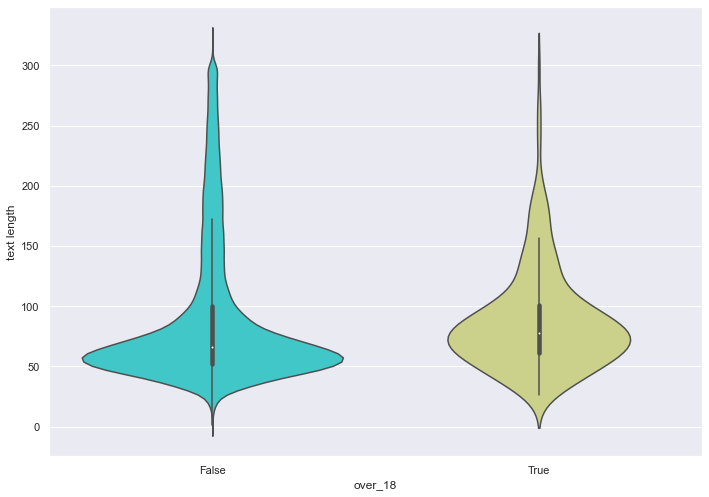

In [172]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.violinplot(x='over_18', y='text length', data=dfs,palette='rainbow')

<AxesSubplot:xlabel='over_18', ylabel='text length'>

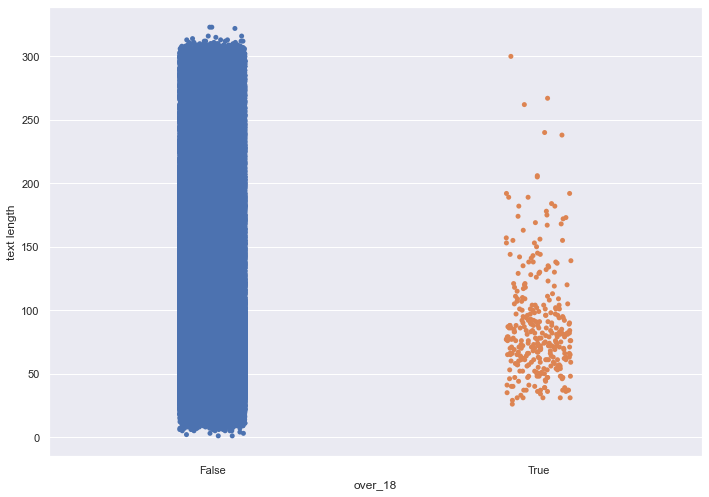

In [173]:
sns.stripplot(x='over_18', y='text length', data=dfs,jitter=True)

<AxesSubplot:xlabel='over_18', ylabel='up_votes'>

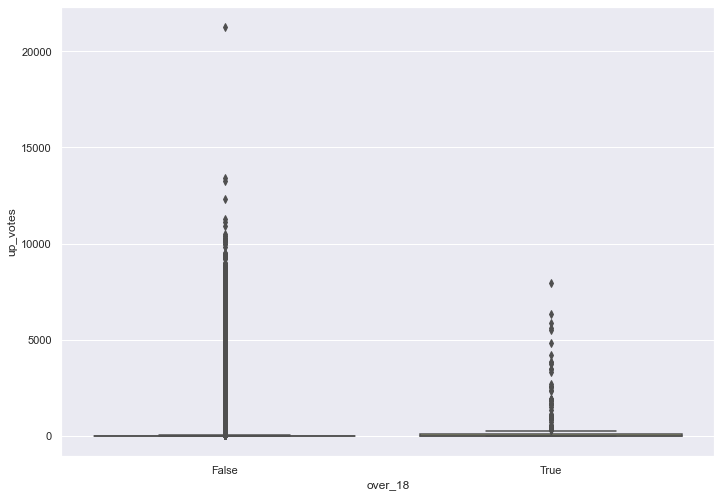

In [174]:
sns.boxplot(x='over_18',y='up_votes',data=dfs,palette='rainbow') ## This plot is not really insightful... 
## a lot of them have 0 upvotes it says

#### Extract days, month, year from date_created 

In [175]:
type(dfs['date_created'].iloc[0])

str

In [176]:
dfs['date_created'] = pd.to_datetime(dfs['date_created'])

In [177]:
type(dfs['date_created'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [179]:
dfs['Month'] = dfs['date_created'].apply(lambda time: time.month)
dfs['Day of Week'] = dfs['date_created'].apply(lambda time: time.dayofweek)
dfs['Year'] = dfs['date_created'].apply(lambda time: time.year)

In [180]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [181]:
dfs['Day of Week'] = dfs['Day of Week'].map(dmap)

In [182]:
dfs.head(3)

,time_created,date_created,up_votes,down_votes,title,over_18,author,category,text length,Month,Day of Week,Year
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews,33,1,Fri,2008
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews,32,1,Fri,2008
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews,31,1,Fri,2008


In [183]:
dfs.tail(3)

,time_created,date_created,up_votes,down_votes,title,over_18,author,category,text length,Month,Day of Week,Year
509233,1479817056,2016-11-22,1,0,Professor receives Arab Researchers Award,False,AUSharjah,worldnews,41,11,Tue,2016
509234,1479817157,2016-11-22,1,0,Nigel Farage attacks response to Trump ambassa...,False,smilyflower,worldnews,55,11,Tue,2016
509235,1479817346,2016-11-22,1,0,Palestinian wielding knife shot dead in West B...,False,superislam,worldnews,64,11,Tue,2016


No handles with labels found to put in legend.


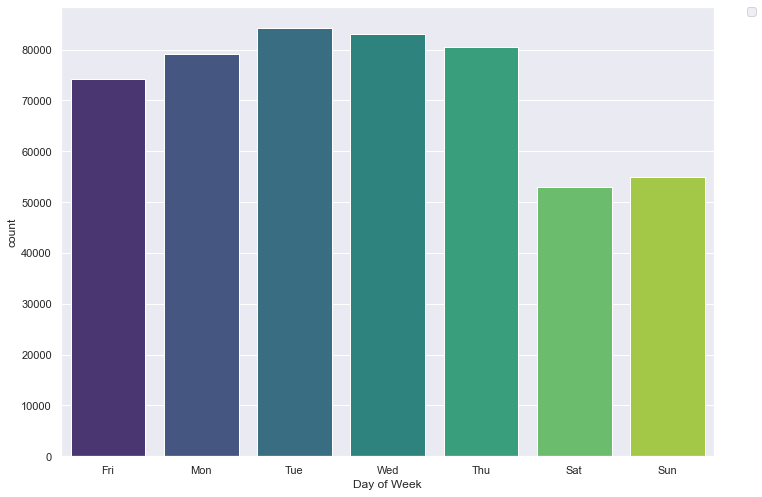

In [184]:
sns.countplot(x='Day of Week',data=dfs,palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) 
## we see that fewer articles are published on weekends, this is understandable...


No handles with labels found to put in legend.


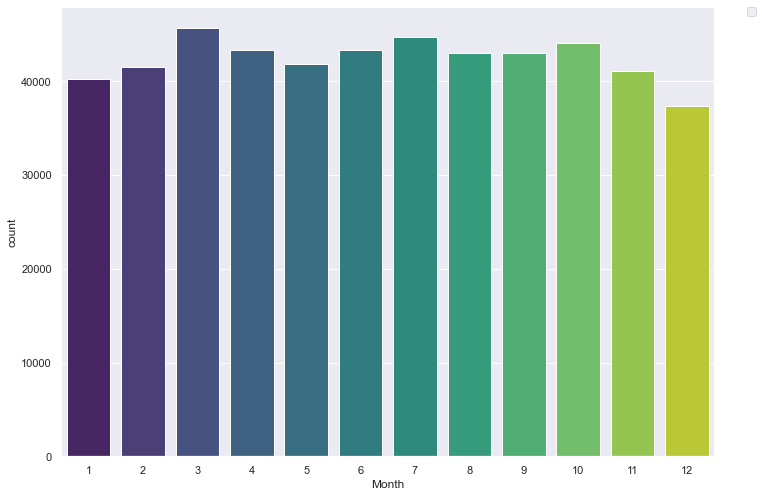

In [185]:
sns.countplot(x='Month',data=dfs,palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) 
## we see that fewer articles are published in Nov, Dec, and Jan, this is probably because of holiday season... 
## There's kind of a dip in Apr-May as well, may be because of tax season...

No handles with labels found to put in legend.


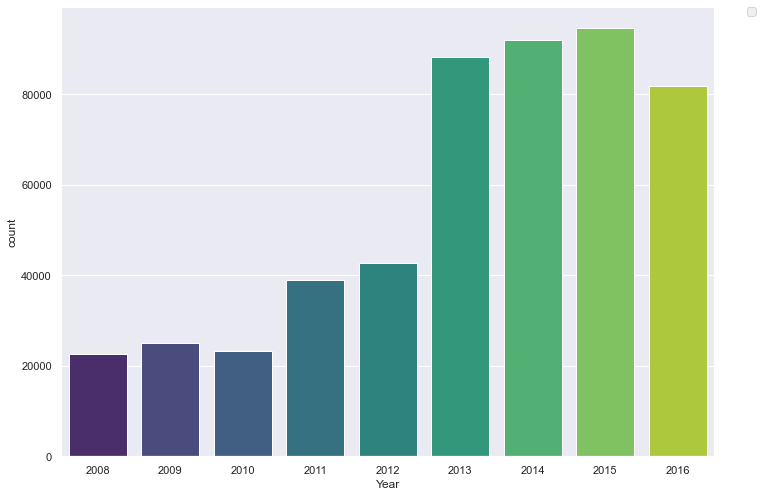

In [186]:
sns.countplot(x='Year',data=dfs,palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) 
## This is interesting!! Number of articles have gone up in last 4 years 2013-2016, this is during Obama's second term 
## So I guess this is insightful... 

<AxesSubplot:xlabel='Year', ylabel='text length'>

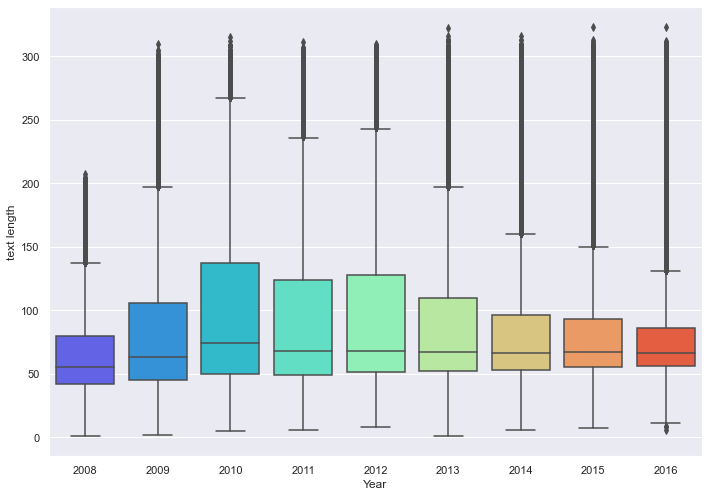

In [187]:
sns.boxplot(x='Year',y='text length',data=dfs,palette='rainbow')
## Median length of the article titles has pretty much been the same over the years...

In [188]:
dummy = dfs.groupby('over_18').mean()

In [189]:
dummy

,time_created,up_votes,down_votes,text length,Month,Year
over_18,,,,,,
False,1.380243e+09,112.067681,0.0,89.748214,6.457630,2013.24282
True,1.374549e+09,380.375000,0.0,87.815625,5.921875,2013.10625


In [190]:
dummy.corr() 
## Wanted to check corr between upvotes and text length...
## There's too many zeros in upvotes, so this corr matrix does not make sense

,time_created,up_votes,down_votes,text length,Month,Year
time_created,1.0,-1.0,NaN,1.0,1.0,1.0
up_votes,-1.0,1.0,NaN,-1.0,-1.0,-1.0
down_votes,NaN,NaN,NaN,NaN,NaN,NaN
text length,1.0,-1.0,NaN,1.0,1.0,1.0
Month,1.0,-1.0,NaN,1.0,1.0,1.0
Year,1.0,-1.0,NaN,1.0,1.0,1.0


In [191]:
dfs['Date']=dfs['date_created'].apply(lambda t: t.date())

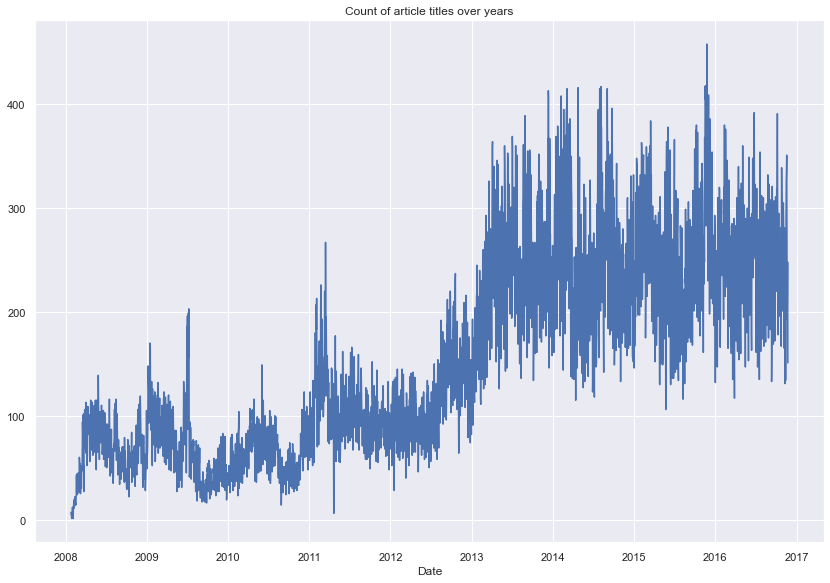

In [192]:
dfs.groupby('Date').count()['text length'].plot()
plt.title('Count of article titles over years')
plt.tight_layout()
## Plot of counts of all articles over years...

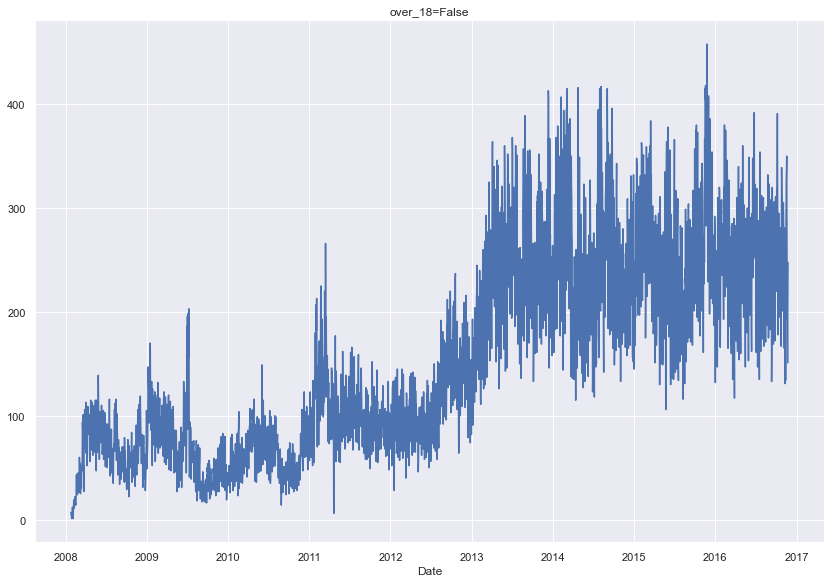

In [193]:
dfs[dfs['over_18']==False].groupby('Date').count()['text length'].plot()
plt.title('over_18=False')
plt.tight_layout()
## Plot of counts of over-18 articles over years...

#### Extract if the article is created on a weekday or a weekend

In [ ]:
dfs['WEEKDAY'] = pd.to_datetime(dfs['date_created']).dt.dayofweek  ## monday = 0, sunday = 6

In [195]:
dfs.head()

,time_created,date_created,up_votes,down_votes,title,over_18,author,category,text length,Month,Day of Week,Year,Date,WEEKDAY
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews,33,1,Fri,2008,2008-01-25,4
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews,32,1,Fri,2008,2008-01-25,4
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews,31,1,Fri,2008,2008-01-25,4
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews,44,1,Fri,2008,2008-01-25,4
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews,47,1,Fri,2008,2008-01-25,4


In [196]:
dfs['weekend_indi'] = 0          ## Initialize the column with default value of 0
dfs.loc[dfs['WEEKDAY'].isin([5, 6]), 'weekend_indi'] = 1  ## 5 and 6 correspond to Sat and Sun

In [197]:
dfs.head()

,time_created,date_created,up_votes,down_votes,title,over_18,author,category,text length,Month,Day of Week,Year,Date,WEEKDAY,weekend_indi
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews,33,1,Fri,2008,2008-01-25,4,0
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews,32,1,Fri,2008,2008-01-25,4,0
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews,31,1,Fri,2008,2008-01-25,4,0
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews,44,1,Fri,2008,2008-01-25,4,0
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews,47,1,Fri,2008,2008-01-25,4,0


In [198]:
dfs.weekend_indi.sum() ## these many instances of weekend title creations

107871

<AxesSubplot:xlabel='weekend_indi', ylabel='count'>

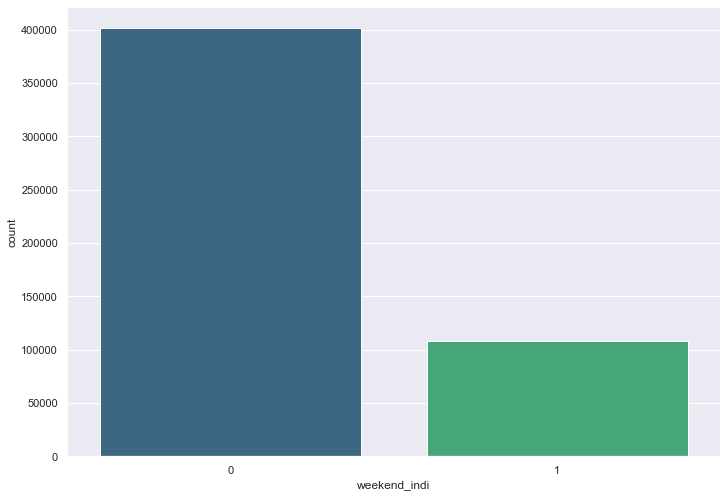

In [199]:
sns.countplot(x='weekend_indi',data=dfs,palette='viridis')

## we see that fewer articles are published on weekends... this is understandable...


#### NLP

In [200]:
X = dfs['title']
y = dfs['weekend_indi']

#### Import CountVectorizer and create a CountVectorizer object

In [201]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [202]:
X = cv.fit_transform(X)

#### Train-Test split

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4,random_state=2021)
## Use 40% of data for testing the model later...

#### Model 

In [204]:
nb.fit(X_train,y_train) ## Using Multinomial Naive-Bayes approach

MultinomialNB()

#### Predictions

In [205]:
predictions = nb.predict(X_test)

In [206]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[152672   7939]
 [ 39403   3681]]


              precision    recall  f1-score   support

           0       0.79      0.95      0.87    160611
           1       0.32      0.09      0.13     43084

    accuracy                           0.77    203695
   macro avg       0.56      0.52      0.50    203695
weighted avg       0.69      0.77      0.71    203695



#### This approach has "good" results but let's try another method using a pipeline... 

#### Let's try Tfidf Transformer using a pipeline

In [207]:
from sklearn.feature_extraction.text import  TfidfTransformer
from sklearn.pipeline import Pipeline

In [213]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  ## strings to token integer counts
    ('tfidf', TfidfTransformer()),  ## integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  ## train on TF-IDF vectors w/ Naive Bayes classifier
])

In [209]:
X = dfs['title']
y = dfs['weekend_indi']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4,random_state=2021)

In [210]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [211]:
predictions = pipeline.predict(X_test)

In [212]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[160547     64]
 [ 43036     48]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88    160611
           1       0.43      0.00      0.00     43084

    accuracy                           0.79    203695
   macro avg       0.61      0.50      0.44    203695
weighted avg       0.71      0.79      0.70    203695



#### Tfidf does a better job in my opinion!!! 